In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
# 파일 경로를 각자 컴퓨터 환경에 맞게 수정하세요!
file_path = '/content/drive/MyDrive/부리부리데마왕/dataset/'

<h1 align="center"> Credit Fraud Detector </h1>

<h2> 소개 </h2>
이 커널에서는 다양한 예측 모델을 사용하여 거래가 정상 결제인지 사기인지를 얼마나 정확하게 감지하는지를 평가할 것입니다. 데이터셋에 설명된 바와 같이, 특성들은 스케일링되어 있고 개인정보 보호로 인해 특성 이름은 공개되지 않았지만 데이터셋의 중요한 측면을 분석할 수 있습니다.

<h2> 목표: </h2>
<ul>
<li> 제공된 데이터 이해. </li>
<li> 각각의 데이터 분포를 50:50으로 나누기("Fraud" , "Non-Fraud")(SMOTE) </li>
<li> Logsitic Regression, SVM, Ridge, KNN, DBSCAN 사용  </li>
</ul>


<h2> 개요: </h2>
I. <b> 데이터 이해하기_EDA</b><br><br>

II. <b> 데이터 전처리</b><br><br>

III. <b>SMOTE</b><br>
a) 분배 및 상관 관계 분석<br>
b) 이상 탐지<br>
c) 차원 축소 및 클러스터링<br>
d) Classifiers<br>
e) Logistic Regression<br>
f) [Oversampling with SMOTE](#smote)<br><br>

IV. <b> 테스트 </b><br>
a) Logistic Regression _ Test<br>



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture

from sklearn.cluster import estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
# 데이터 불러오기
data = pd.read_csv(file_path + 'creditcard_data.csv')

In [ ]:

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Good No Null Values!
data.isnull().sum().max()

0

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405008e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


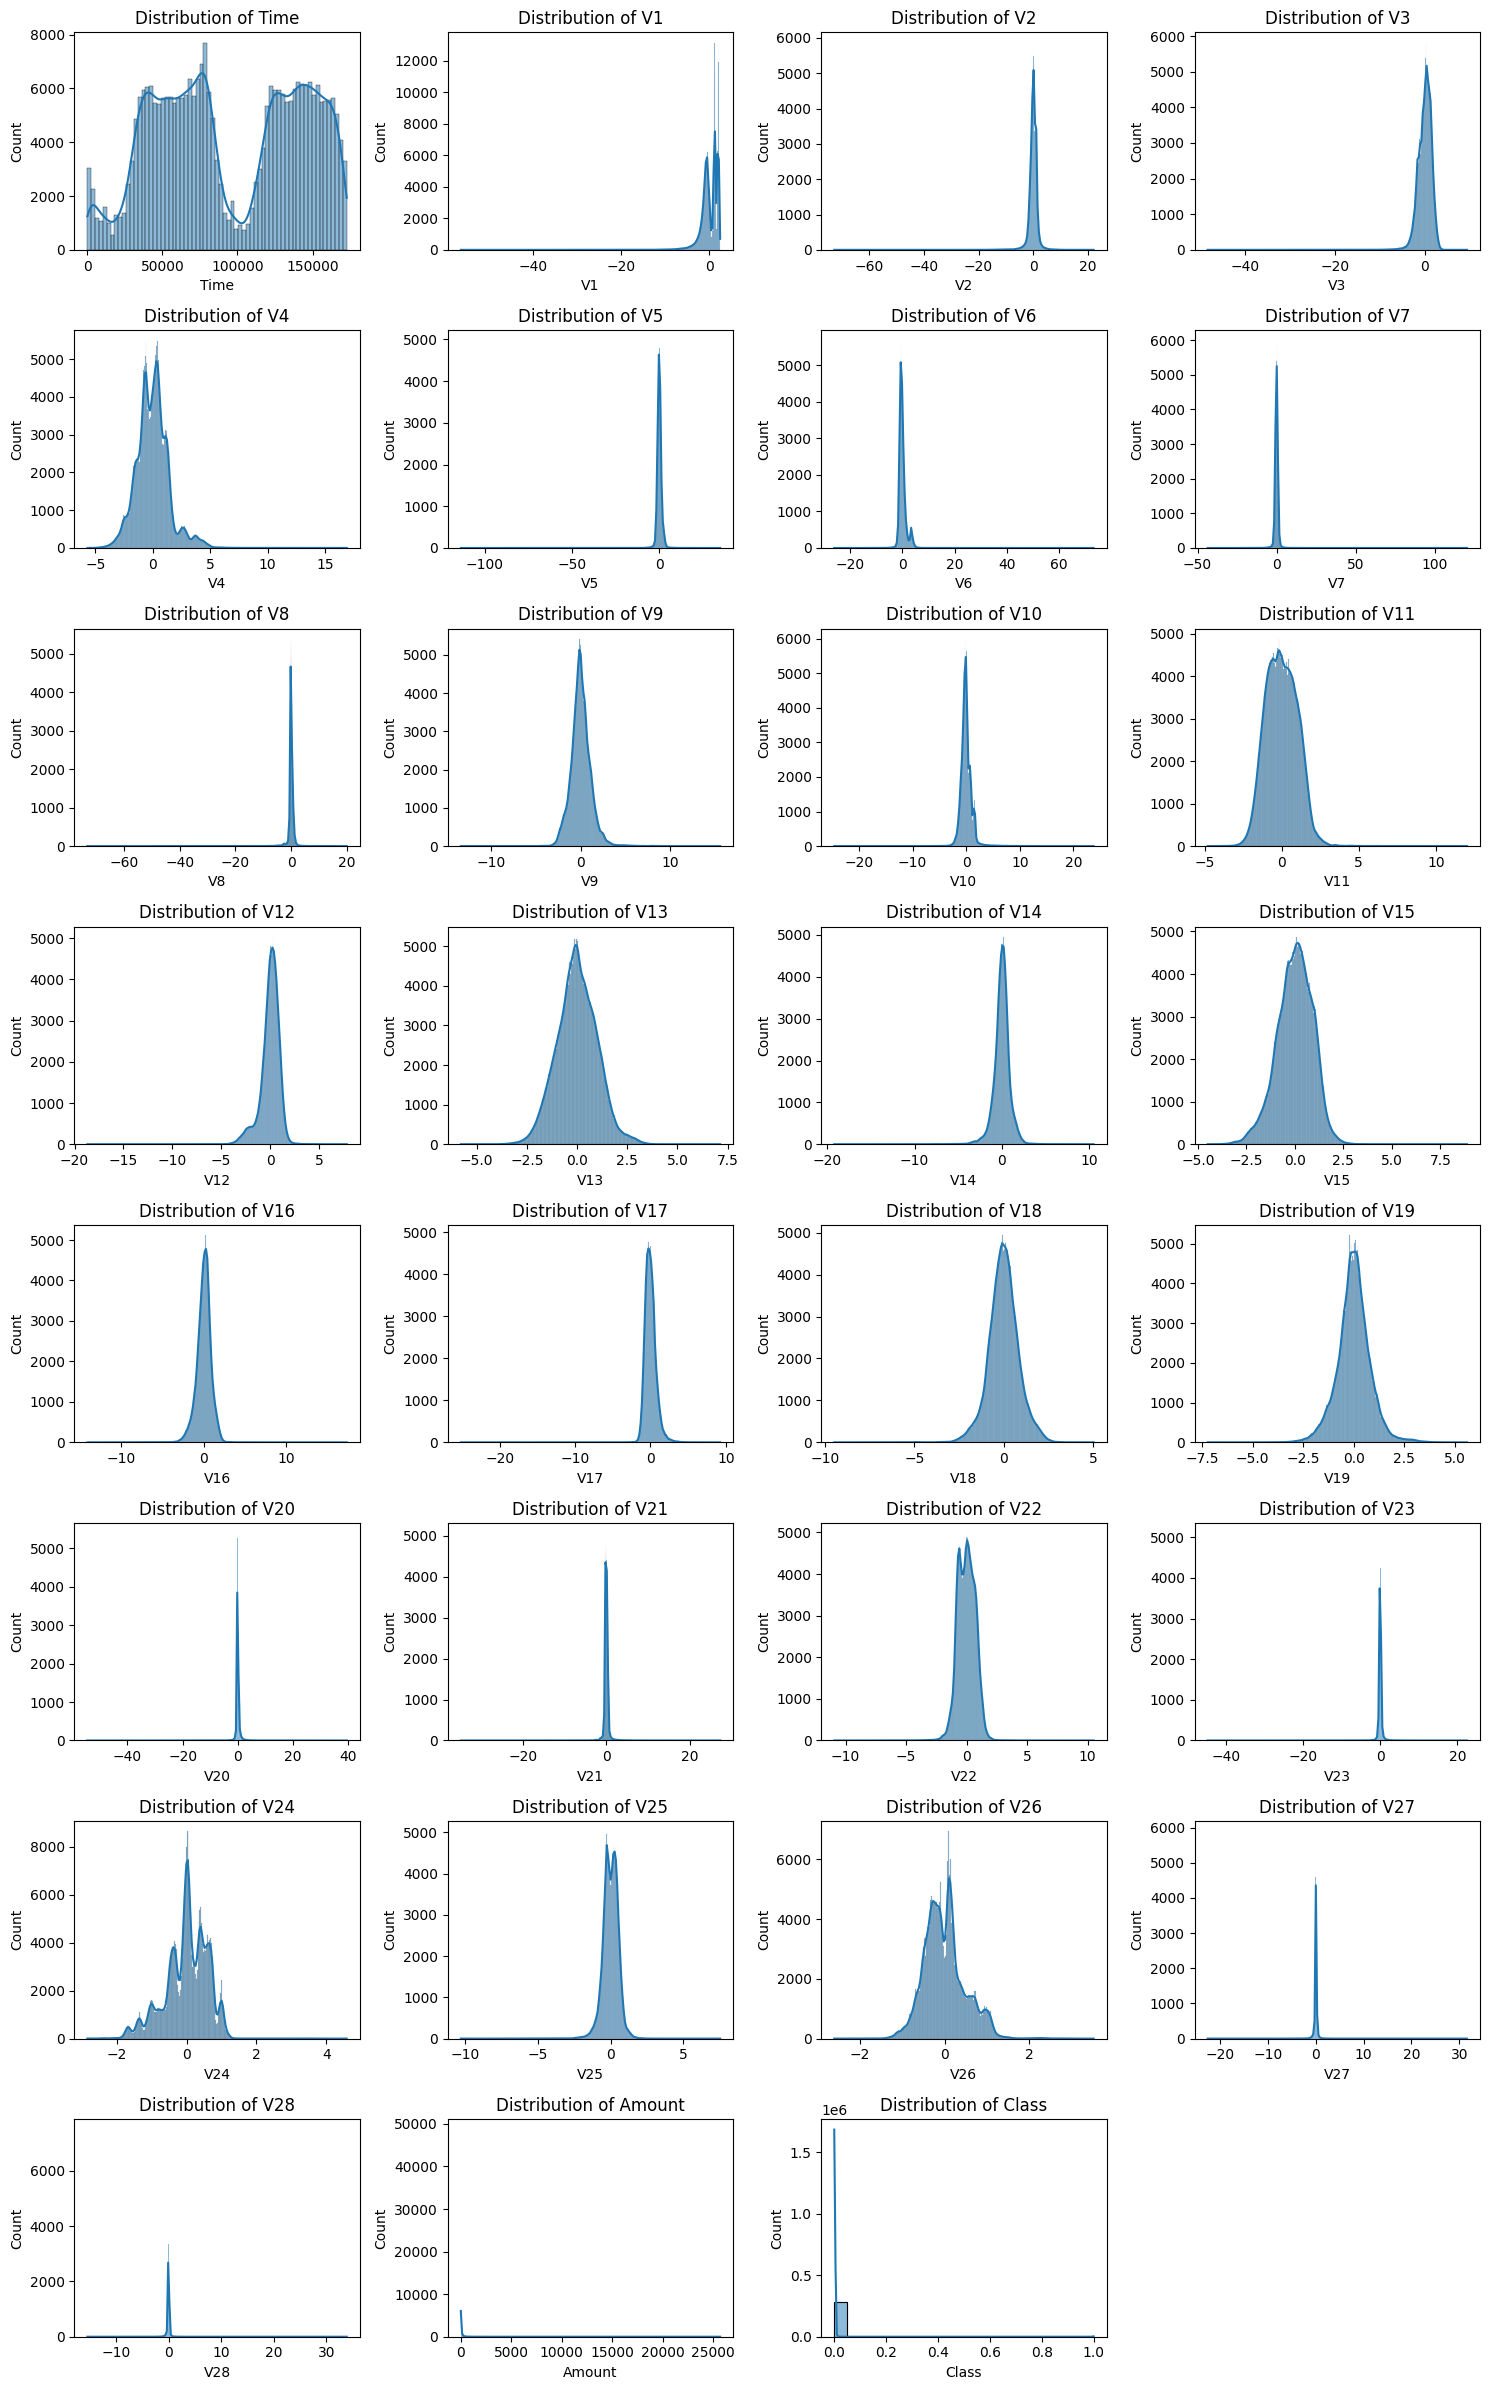

In [ ]:
num_cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

# 그래프의 크기 및 행, 열 설정
num_cols_count = len(num_cols)
num_cols_per_row = 4  # 각 행당 그래프 수를 조절
num_rows = int(math.ceil(num_cols_count / num_cols_per_row))

plt.figure(figsize=(15, 3 * num_rows))

for i, feature in enumerate(num_cols, 1):
    plt.subplot(num_rows, num_cols_per_row, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# 그래프 출력
plt.tight_layout()
plt.show()

- Right Skew

 ‘V3’, ‘V5’, ‘V7’,’V9’, ‘V10’, ‘V12’, ‘V14’, ‘V15’, ‘V16’, ‘V17’, ‘V18’, ‘V24’,’V27’, ‘V28’

- Left skew

 ‘V2’, ‘V11’, ‘V19’, ‘V20’, ‘V21’

- 거의 정규분포

 ‘V1’, ‘V4’,’V6’, ‘V8’, ’V13’, ‘V22’, ‘V23’, ‘V25’, ‘V26’



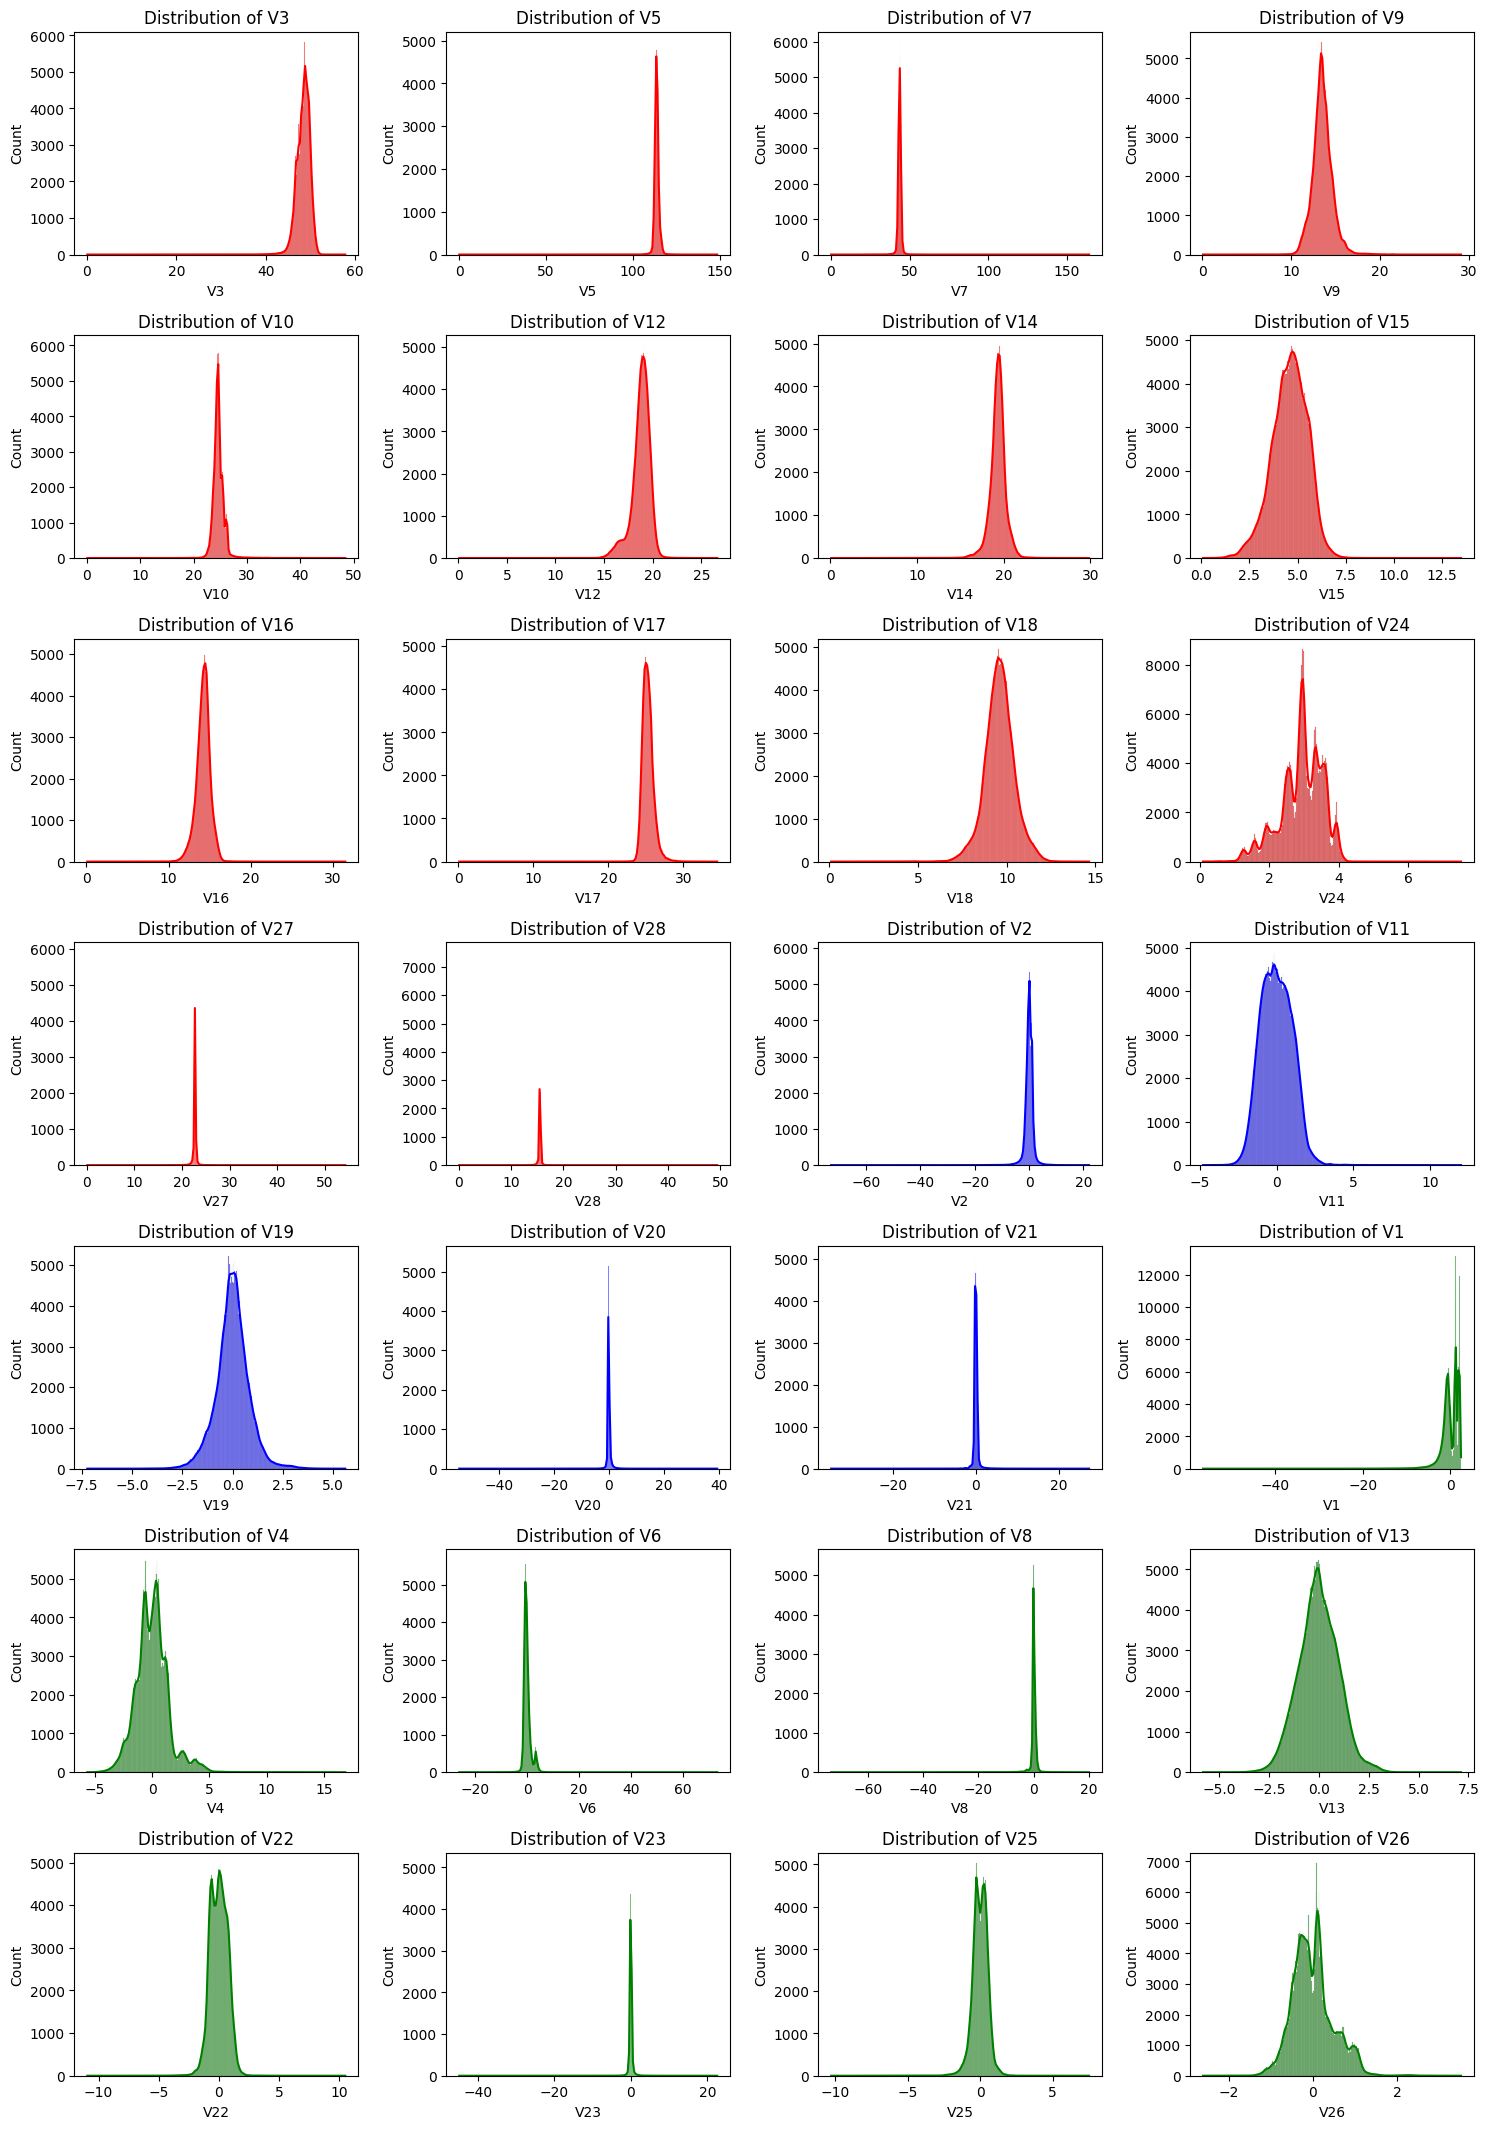

In [ ]:
### 유빈이 작  - ppt 용####

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Your data and num_cols definition here...

# Grouping variables based on skewness
pro_skew = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
neg_skew = ['V2', 'V11', 'V19', 'V20', 'V21']
normal_col = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']

# Define colors for each group
pro_skew_color = 'red'
neg_skew_color = 'blue'
normal_color = 'green'

# Set up subplots
plt.figure(figsize=(15, 3 * num_rows))

# Plotting variables with positive skewness
for i, feature in enumerate(pro_skew, 1):
    plt.subplot(num_rows, num_cols_per_row, i)
    sns.histplot(data[feature], kde=True, color=pro_skew_color)
    plt.title(f'Distribution of {feature}')

# Plotting variables with negative skewness
for i, feature in enumerate(neg_skew, 1):
    plt.subplot(num_rows, num_cols_per_row, i + len(pro_skew))
    sns.histplot(data[feature], kde=True, color=neg_skew_color)
    plt.title(f'Distribution of {feature}')

# Plotting variables with normal distribution
for i, feature in enumerate(normal_col, 1):
    plt.subplot(num_rows, num_cols_per_row, i + len(pro_skew) + len(neg_skew))
    sns.histplot(data[feature], kde=True, color=normal_color)
    plt.title(f'Distribution of {feature}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

<ipython-input-15-3c98dd556c2a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount, ax=ax[0], color='r')
<ipython-input-15-3c98dd556c2a>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time, ax=ax[1], color='b')


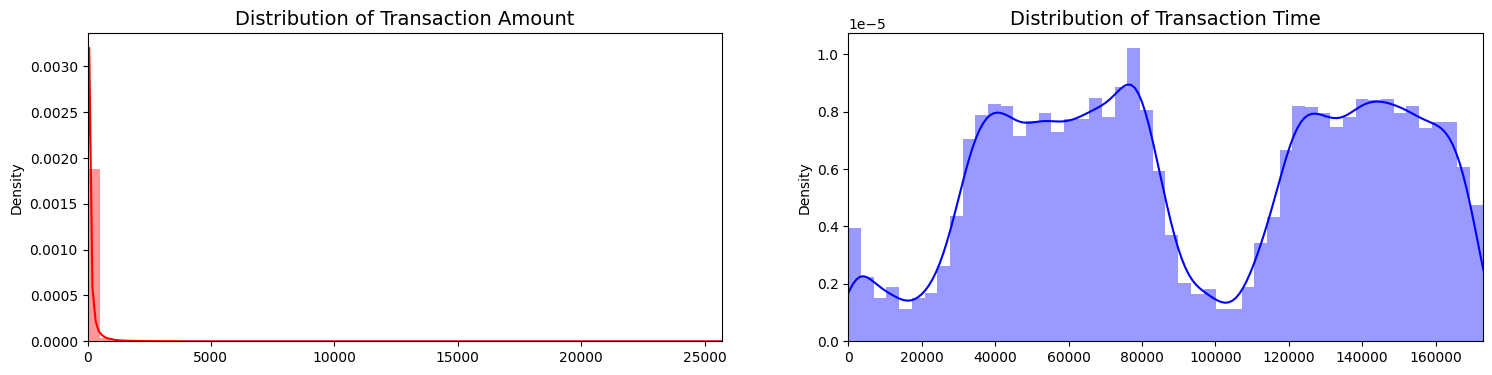

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount = data['Amount'].values
time = data['Time'].values

sns.distplot(amount, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time), max(time)])



plt.show()

 <b>금액(Amount)</b>
 -  대부분의 거래금액이 낮은 금액에 집중되어 있는 것을 볼 수 있다. 하지만 사기 거래가 높은 금액이 아닌 대다수 낮은 금액에 분포되고 있음을 알 수 있다.


 <br>

 <b>시간(Time)</b>
  -  특정 시간에 거래가 활발한 것을 볼 수 있으며
 거래금액이 더 많이 일어남을 알 수 있다.

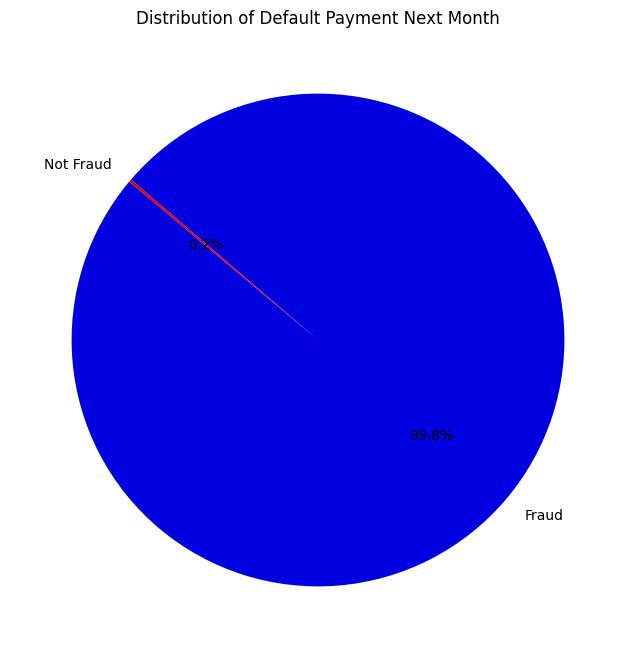

In [ ]:
colors = ["#0101DF", "#DF0101"]
# def_pay의 분포를 위한 데이터 준비
default_counts = data['Class'].value_counts()
labels = ['Fraud', 'Not Fraud']

# Pie chart 생성
plt.figure(figsize=(8, 8))
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors =colors)
plt.title('Distribution of Default Payment Next Month')
plt.show()


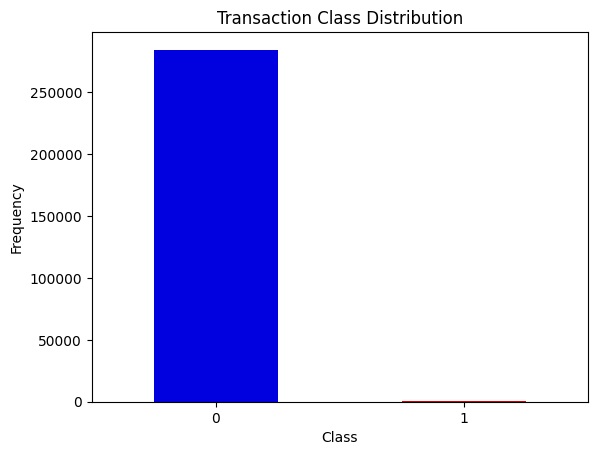

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color=colors)
LABELS = [0,1]
plt.title("Transaction Class Distribution")
# plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

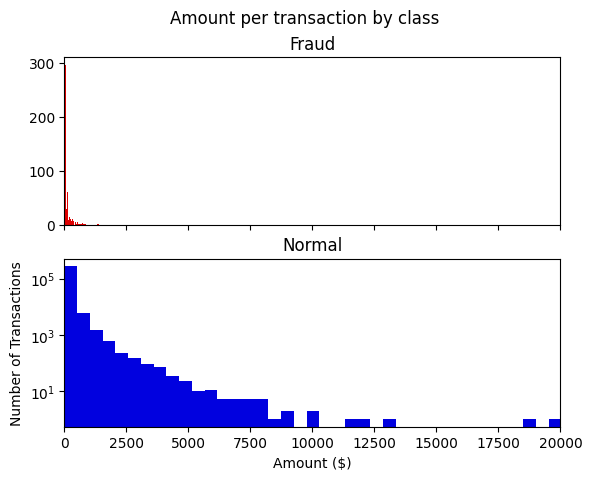

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins, color = colors[1])
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins, color = colors[0])
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


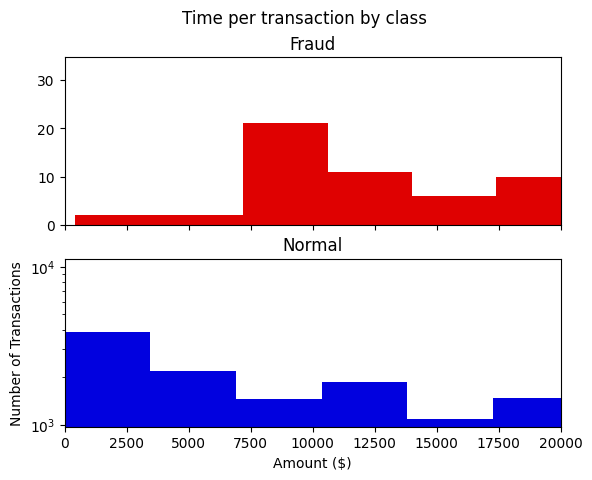

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time per transaction by class')
bins = 50
ax1.hist(Fraud.Time, bins = bins, color = colors[1])
ax1.set_title('Fraud')
ax2.hist(Normal.Time, bins = bins, color = colors[0])
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


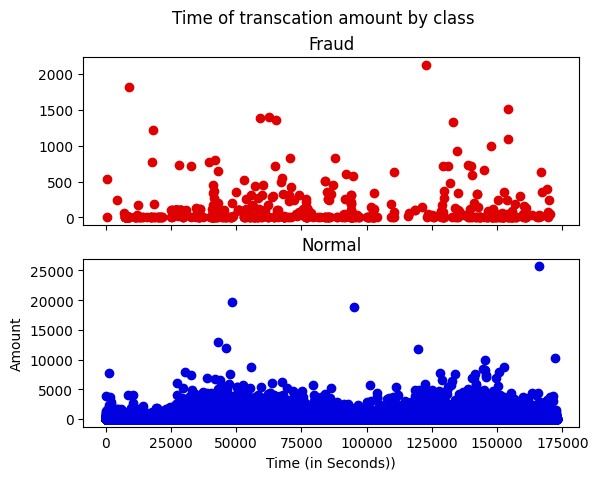

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transcation amount by class')
bins = 50
ax1.scatter(Fraud.Time, Fraud.Amount, color = colors[1])
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount, color = colors[0])
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds))')
plt.ylabel('Amount')
plt.show();


분포(Distributions)
- Class의 특징에 따른 Time에 따른 Amount 분포의 특징을 보면 특정구간에만 분포되어 있음이 아닌 것을 알 수 있다.  
- 하지만 상대적으로 중간 시간 대에 비정상 거래가 많이 일어 났음을 알 수 있다.

<h3> 요약: </h3>
<ul>
<li>거래금액은 상대적으로 <b>작습니다</b>. 모든 거래의 평균 금액 USD 88. </li>
<li><b>"Null"</b> 값이 없으므로 값을 새로 넣을 필요가 없습니다. </li>
<li> 대부분의 거래는 <b>Non-Fraud</b> (99.83%) 이며  <b>Fraud</b> 거래는 (017%) 비율로 발생합니다. </li>
<li> 상대적으로 거래금액이 크지 않는 경우가 대다수 이기에 <b>높은 거래 금액은</b> 이상치 처리하고  <b>특정 시간대</b>의 특징을 뽑을 수 있다면 잘 예측할 수 있을 것이라고 가정할 수 있다. </li>
<li>Fraud와 Non-Fraud 간의 데이터 불균형이 크기에 올바른 모델의 성능을 높이기 위해선 데이터의 불균형 해소가 필요함을 알 수 있다.  </li>
<li>데이터의 분포가 <b>Amount(금액)<b>의 경우 낮은 금액에 쏠려 있기에 scaling이 필요함을 알 수 있다. </li>
</ul>

In [ ]:
data.corr()['Class']

Time     -0.012322
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326482
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

<Axes: >

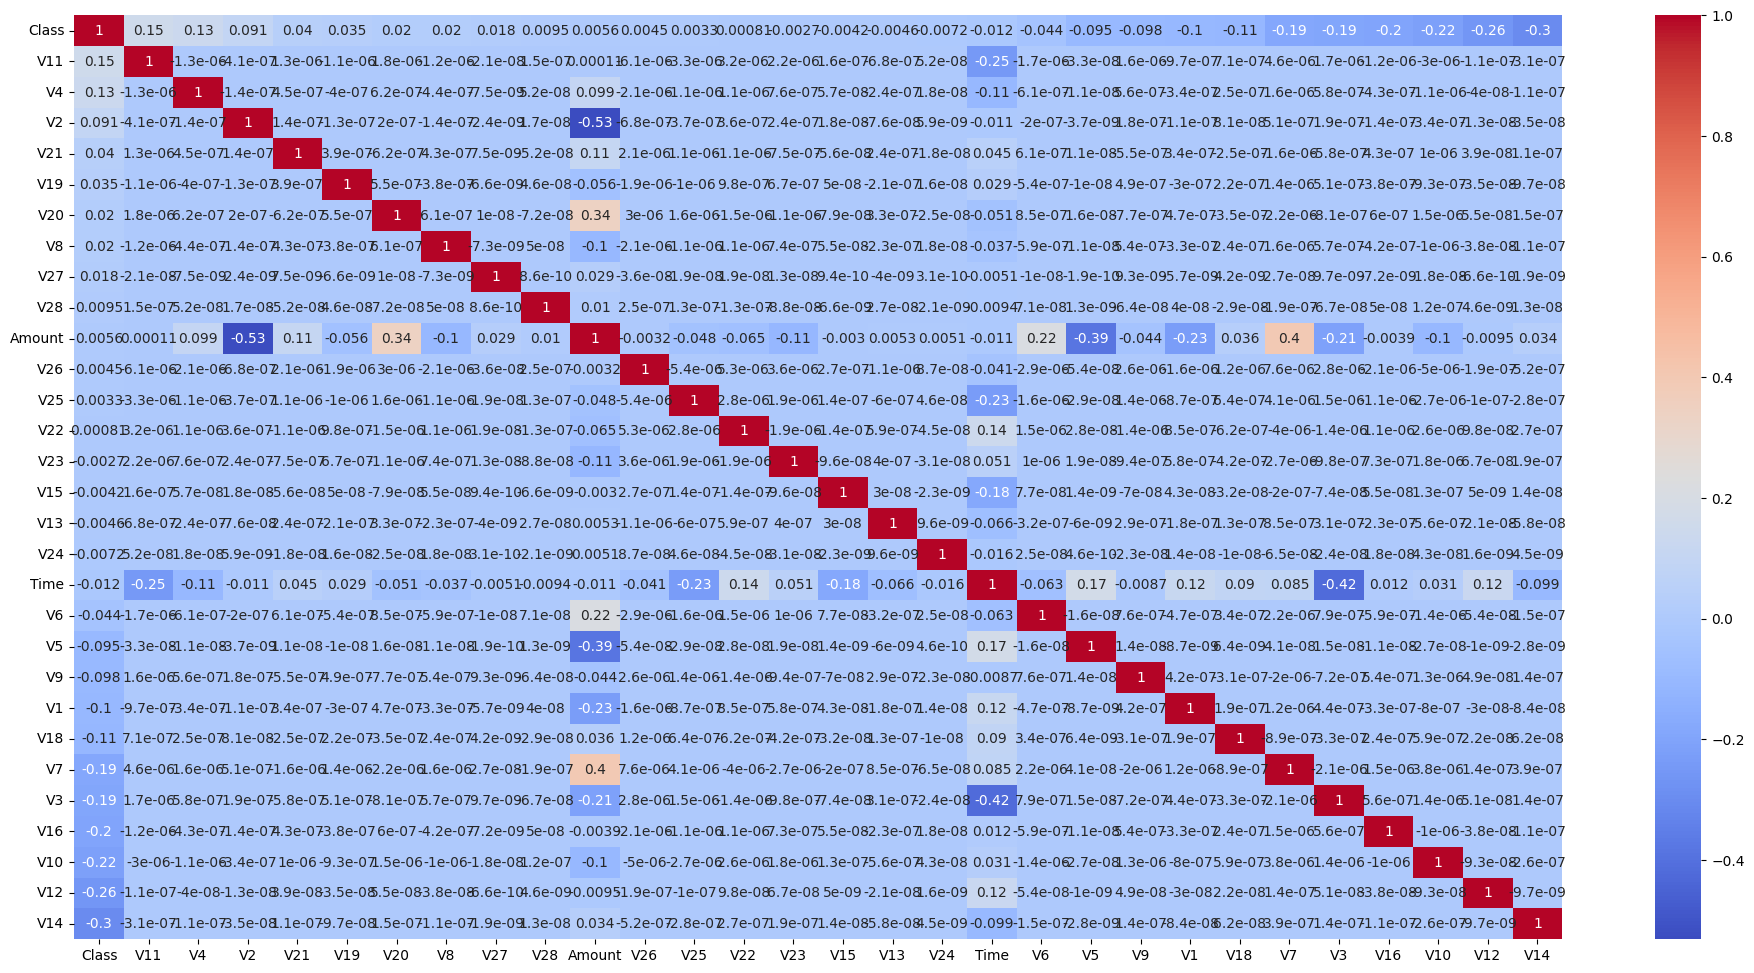

In [ ]:
# class에 대한 상관관계 분석 시각화
X=30
cols=data.corr().nlargest(X, 'Class')['Class'].index
map=data[cols].corr()
plt.figure(figsize=(24,12))
sns.heatmap(map, annot=True, cmap='coolwarm') # fmt='.2f'

In [ ]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
import pandas as pd
import numpy as np

def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def logTransform(data, columns):
    scaled_data = data[columns].apply(lambda x: np.log1p(x))
    return scaled_data

left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']


if (data[left_skewed_cols].min(axis=0) <= 0).any():
    for col in left_skewed_cols:
        if data[col].min() <= 0:
            data[col] += abs(data[col].min()) + 0.1

# train_scaler
train_left_skewed = logTransform(data, left_skewed_cols)
train_right_skewed = quantileTransform(data, right_skewed_cols)

train_transformed = pd.concat([data, train_left_skewed.add_suffix('_log_Transform'), train_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import MinMaxScaler, RobustScaler
minmax_scaler = MinMaxScaler()
rob_scaler = RobustScaler()

s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
scaling_data = ['Amount', 'Time']

for col in s_columns:
    train_transformed[col + '_MM_Transform'] = minmax_scaler.fit_transform(train_transformed[[col]])


for col in scaling_data:
    train_transformed[col + '_rub_Transform'] = rob_scaler.fit_transform(train_transformed[[col]])
#train_transformed --> 전처리가 진행된 데이터
# train_transformed.drop(columns ='Time', inplace = True)

train_transformed : 전처리 진행 데이터 + 기존 데이터

Train = 전처리 데이터

In [ ]:
Train = train_transformed.copy()
Train.drop(columns = left_skewed_cols + right_skewed_cols + s_columns + scaling_data, inplace = True)
Train.head()

,Class,V3_log_Transform,V5_log_Transform,V7_log_Transform,V9_log_Transform,V10_log_Transform,V12_log_Transform,V14_log_Transform,V15_log_Transform,V16_log_Transform,...,V4_MM_Transform,V6_MM_Transform,V8_MM_Transform,V13_MM_Transform,V22_MM_Transform,V23_MM_Transform,V25_MM_Transform,V26_MM_Transform,Amount_rub_Transform,Time_rub_Transform
0,0,3.950511,4.740618,3.804367,2.701217,3.249562,2.953133,2.995890,1.955453,2.691884,...,0.313023,0.267669,0.786444,0.371591,0.522992,0.663793,0.585122,0.394557,1.783399,-0.994981
1,0,3.903831,4.744091,3.797250,2.658765,3.239513,3.037304,3.004224,1.830099,2.753264,...,0.271796,0.262192,0.786298,0.486190,0.480237,0.666938,0.587290,0.446013,-0.269843,-0.994981
2,0,3.935716,4.739177,3.816584,2.566441,3.254085,2.988194,3.003124,2.072519,2.512827,...,0.268766,0.281122,0.788042,0.503854,0.546030,0.678939,0.559515,0.402727,4.984069,-0.994969
3,0,3.936102,4.743479,3.804323,2.576197,3.243893,2.993828,2.997051,1.602922,2.651142,...,0.213661,0.275559,0.789434,0.487635,0.510277,0.662607,0.614245,0.389197,1.418390,-0.994969
4,0,3.931322,4.740017,3.812207,2.731233,3.274929,3.011700,2.954632,1.753376,2.693167,...,0.269796,0.263984,0.782484,0.552509,0.547271,0.663392,0.566343,0.507497,0.670626,-0.994957


In [ ]:
Train.isnull().sum()

Class                   0
V3_log_Transform        0
V5_log_Transform        0
V7_log_Transform        0
V9_log_Transform        0
V10_log_Transform       0
V12_log_Transform       0
V14_log_Transform       0
V15_log_Transform       0
V16_log_Transform       0
V17_log_Transform       0
V18_log_Transform       0
V24_log_Transform       0
V27_log_Transform       0
V28_log_Transform       0
V2_qt_Transform         0
V11_qt_Transform        0
V19_qt_Transform        0
V20_qt_Transform        0
V21_qt_Transform        0
V1_MM_Transform         0
V4_MM_Transform         0
V6_MM_Transform         0
V8_MM_Transform         0
V13_MM_Transform        0
V22_MM_Transform        0
V23_MM_Transform        0
V25_MM_Transform        0
V26_MM_Transform        0
Amount_rub_Transform    0
Time_rub_Transform      0
dtype: int64

복제(Replication): 소수 클래스의 샘플을 복제하여 데이터 수를 증가시키는 방법으로 단순하게 동일한 샘플을 복사함으로써 오버샘플링을 수행

SMOTE (Synthetic Minority Over-sampling Technique): 소수 클래스 샘플의 이웃을 활용하여 새로운 합성 데이터를 생성하는 방법으로 이는 원래 데이터를 보간하여 새로운 샘플생성

ADASYN (Adaptive Synthetic Sampling): SMOTE와 유사하지만 샘플링을 적응적으로 수행하여 밀집된 지역에 더 많은 합성 데이터를 생성

In [ ]:
from imblearn.over_sampling import ADASYN

# ADASYN 모델 초기화 및 샘플링 전략 설정
adasyn = ADASYN(sampling_strategy={1: 280000}, random_state=42)

# 특징과 클래스 분리
X = Train.drop('Class', axis=1)
y = Train['Class']

# ADASYN을 사용하여 오버샘플링
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# 새로운 데이터프레임 생성
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)

In [ ]:
Fraud = balanced_data[balanced_data['Class']==1]
Normal = Train[Train['Class']==0]
merged_data = pd.concat([Fraud, Normal], ignore_index=True)

In [ ]:
dupli = merged_data.duplicated()
merged_data = merged_data.drop_duplicates()
merged_data = merged_data.reset_index(drop=True)

In [ ]:
merged_data.describe()

,V3_log_Transform,V5_log_Transform,V7_log_Transform,V9_log_Transform,V10_log_Transform,V12_log_Transform,V14_log_Transform,V15_log_Transform,V16_log_Transform,V17_log_Transform,...,V6_MM_Transform,V8_MM_Transform,V13_MM_Transform,V22_MM_Transform,V23_MM_Transform,V25_MM_Transform,V26_MM_Transform,Amount_rub_Transform,Time_rub_Transform,Class
count,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,...,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000,563201.000000
mean,3.870900,4.740751,3.782747,2.637761,3.192799,2.900792,2.896026,1.709528,2.657800,3.215128,...,0.259693,0.784425,0.440046,0.511349,0.664092,0.577070,0.423288,1.862182,0.112666,0.497068
std,0.058990,0.018605,0.056697,0.090559,0.096876,0.162139,0.180741,0.169290,0.164128,0.150874,...,0.013572,0.018522,0.073496,0.033395,0.018041,0.031806,0.072963,4.374047,0.541895,0.499992
min,0.095310,0.095310,0.095310,0.095310,0.095310,0.095310,0.095310,0.095310,0.095310,0.095310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.307434,-0.994981,0.000000
25%,3.845442,4.733831,3.771530,2.585349,3.146925,2.834693,2.783324,1.614523,2.597200,3.188501,...,0.252892,0.782388,0.386979,0.487393,0.662577,0.560731,0.374428,-0.250901,-0.337771,0.000000
50%,3.882607,4.742264,3.795847,2.647875,3.224838,2.959011,2.972756,1.730719,2.708572,3.258695,...,0.258932,0.785609,0.439351,0.511374,0.665091,0.579492,0.414575,0.078752,0.001665,0.000000
75%,3.909635,4.749401,3.809592,2.694208,3.250056,2.997531,3.018208,1.829384,2.754377,3.287370,...,0.265439,0.790046,0.489556,0.534402,0.668225,0.597874,0.462146,1.779982,0.642285,1.000000
max,4.074280,5.008266,5.107440,3.405490,3.900626,3.318978,3.428848,2.672540,3.482623,3.569992,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,358.708217,1.034983,1.000000


Distribution of the Classes in the subsample dataset
0    0.502932
1    0.497068
Name: Class, dtype: float64


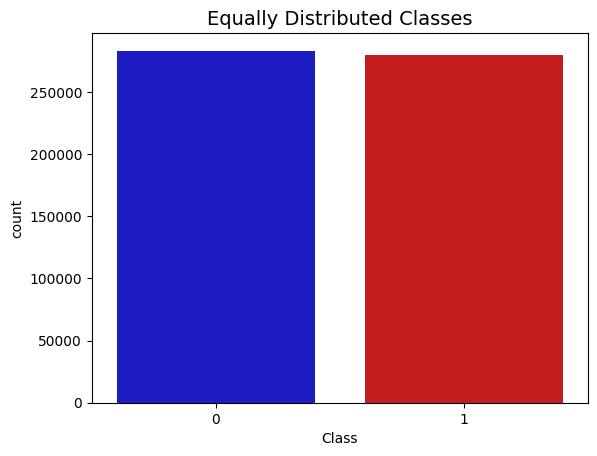

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(merged_data['Class'].value_counts()/len(merged_data))



sns.countplot(x = 'Class', data=merged_data, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
Train = merged_data

In [ ]:
train = Train.drop('Class',axis=1).values
target = Train['Class'].values
target = pd.DataFrame(target, columns=['Class'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

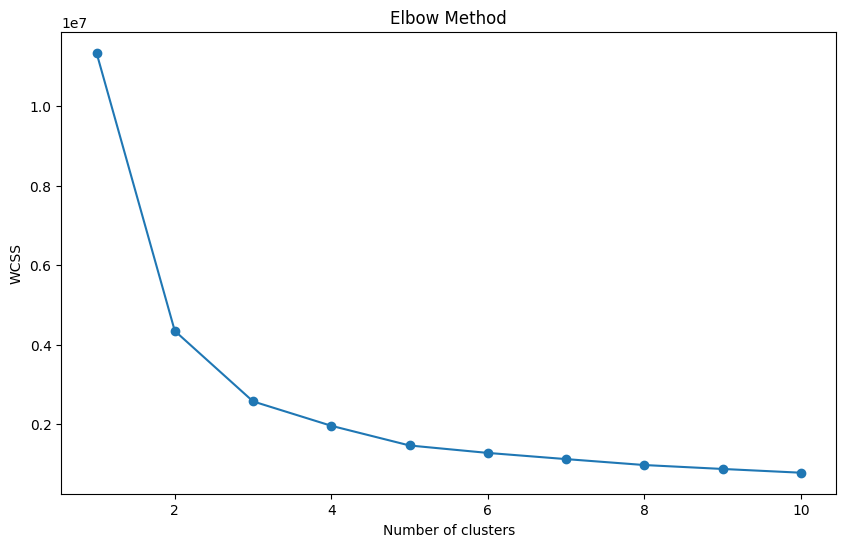

In [ ]:
# Removing the 'Class' column for clustering
clustering_data = Train.drop(columns=['Class'])

# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Square
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


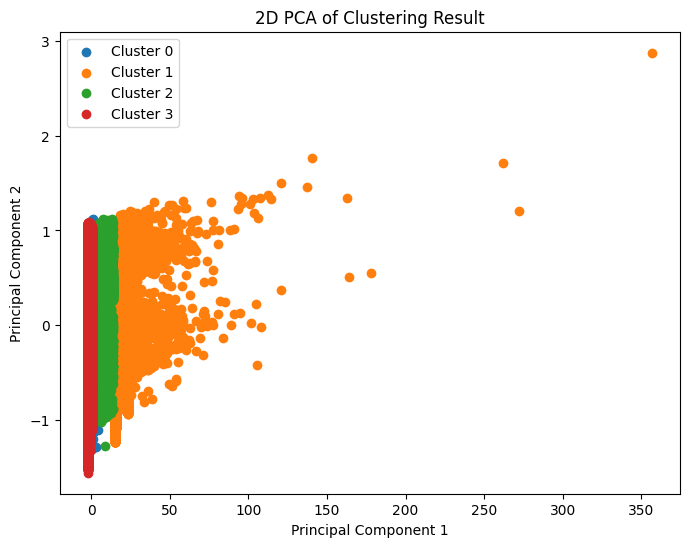

In [ ]:
clustering_data = Train.drop(columns=['Class'])

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(clustering_data)

# 클러스터 레이블을 데이터에 추가
Train['Cluster'] = kmeans.labels_

# 클러스터 중심까지의 거리 계산
distances = kmeans.transform(clustering_data)

# 클러스터 중심까지의 역수 거리 계산
inverse_distances = 1 / distances

# 각 클러스터 내의 역수 거리의 합 계산
inverse_distance_sums = inverse_distances.sum(axis=0)

# 각 데이터 포인트의 클러스터 내 기여도 계산 (정규화된 역수 거리)
contributions = inverse_distances / inverse_distance_sums

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
clustering_data_2d = pca.fit_transform(clustering_data)

# 축소된 데이터를 기반으로 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
for i in range(4):
    # 클러스터별로 데이터 포인트 플롯
    plt.scatter(clustering_data_2d[Train['Cluster'] == i, 0], clustering_data_2d[Train['Cluster'] == i, 1], label=f'Cluster {i}')

plt.title('2D PCA of Clustering Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
## DBSCAN

from sklearn.cluster import DBSCAN

# Re-applying DBSCAN clustering after the code execution state reset
# Using default parameters for eps and min_samples
dbscan = DBSCAN()
dbscan_clusters = dbscan.fit_predict(clustering_data)

# Count the number of clusters and noise points
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

n_clusters, n_noise

## Data_importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

def train_and_evaluate(model, model_name, train_x, train_y):
    print(f'Model Tune for {model_name}.')
    model.fit(train_x, train_y)

    feature_importances = model.feature_importances_
    sorted_idx = feature_importances.argsort()

    plt.figure(figsize=(10, len(train_x.columns)))
    plt.title(f"Feature Importances ({model_name})")
    plt.barh(range(train_x.shape[1]), feature_importances[sorted_idx], align='center')
    plt.yticks(range(train_x.shape[1]), train_x.columns[sorted_idx])
    plt.xlabel('Importance')
    plt.show()

    return model, feature_importances

train_x = Train.drop(columns=['Class'])
train_y = Train['Class']



- LGBM

In [ ]:
# Model Tune for LGBM
lgbm_model, lgbm_feature_importances = train_and_evaluate(LGBMRegressor(), 'LGBM', train_x, train_y)

In [ ]:
lgbm_feature_importances

Randomforest

In [ ]:
# Model Tune for Randomforest
ada_model, ada_feature_importances = train_and_evaluate(RandomForestRegressor(), 'RandomForest', train_x, train_y)

In [ ]:
ada_feature_importances